# Car Price Prediction

## Data Understanding

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import os

In [2]:
# Set the working directory & Read the data
os.chdir("C:\\Sunder\\DataScience\\MachineLearning\\Projects\\CarPricing")
cars = pd.read_csv("CarPrice.csv")

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.isna().sum()
# No null values or NA Values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
unique_values = cars.nunique()
print(unique_values)

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64


### Understand some of the variables data through plots and counts

In [7]:
# symboling
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
# Aspiration
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [9]:
# Drive Wheel
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

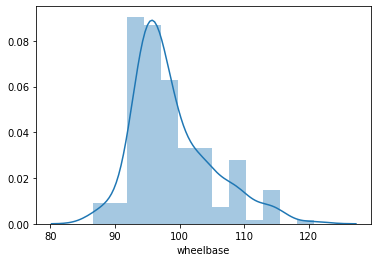

In [10]:
# Wheel base
sns.distplot(cars['wheelbase'])
plt.show()

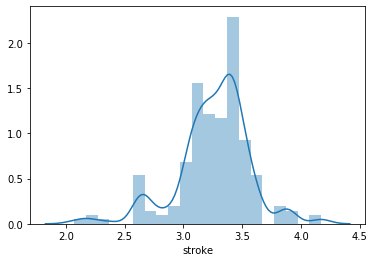

In [11]:
# Stroke
sns.distplot(cars['stroke'])
plt.show()

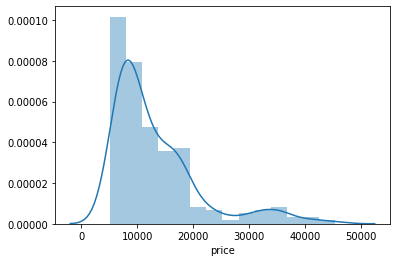

In [12]:
# Target variable (Price)
sns.distplot(cars['price'])
plt.show()

### Data Exploration

In [13]:
# Identify all the numeric variables as this would be key during linear regression
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# dropping symboling and car_ID 
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


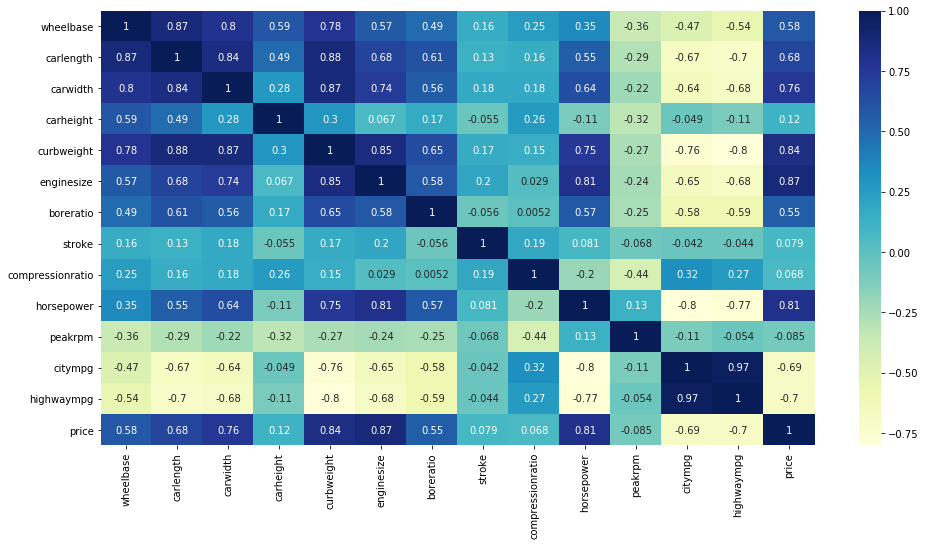

In [15]:
# Compute correlation annd plot
cor = cars_numeric.corr()
# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Some Inferences
Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower 
  and (negatively) correlated with citympg and highwaympg

Some of the independent variables are correlated among themselves (wheelbase to carlength, carwidth, curbweight)      

## Data Cleaning

In [16]:
# Converting symboling to categorical variable
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 "CarName" column is a combination of company name and model name. We need to extract the company name 

In [35]:
cars['CarName'][:10]

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

In [17]:
# Extract the first token based on space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:20]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
Name: CarName, dtype: object

In [18]:
# There are a few names which are separated by "-". Using Regular expressions
import re

exp = re.compile(r'\w+-?\w+')
carnames = cars['CarName'].apply(lambda x: re.findall(exp, x)[0])
cars['car_company'] = carnames
# look at all values 
cars['car_company'].astype('category').value_counts().sort_index(ascending=True)

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: car_company, dtype: int64

Some company names like toyota/Toyouta , nissan/Nissan are misspelled or multispelled in different cases. We need to merge them

In [19]:
# Replacing misspelled carnames 
# volkswagen
cars.loc[(cars['car_company'] == "vw") | 
         (cars['car_company'] == "vokswagen")
         , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [20]:
cars['car_company'].astype('category').value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: car_company, dtype: int64

In [58]:
# drop carname variable
cars = cars.drop('CarName', axis=1)

## Data Preparation for Model Bulding

In [48]:
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

In [49]:
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,-1,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,-1,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [50]:
# Convert the categorical values to columns
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Drop the categorical columns and merge the dummies columns
X = X.drop(list(cars_categorical.columns), axis=1)
X = pd.concat([X, cars_dummies], axis=1)

In [52]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [53]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [27]:
# Building the model initially with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Predict the dependent variable for the test values 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.8382621393399066


1. RFE:- Select 15 features using RFE (Recursive Feature Elimination) 

In [29]:
# RFE with 15 features
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)  

[False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True  True  True
 False  True  True  True False False False False False False False False
  True False False False False False False False False False False  True
 False  True False False False False False False]
[ 4  5  1  7  1  1  1  1  9 25 13 45 22 24 36 38 37 39 11  2 41 19  6 17
 18 48 23  1 27 47 40 20 43  1  1  1 26  1  1  1 14 44 10 52 46 50 53 29
  1 35 42 15 21 49 28 31 54  3 32  1 16  1 51  8 30 33 34 12]


In [30]:
# making predictions using rfe model (15 features)
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8941491916479425


In [31]:
# import statsmodels
import statsmodels.api as sm  

# subset the features selected by rfe_15
col_15 = X_train.columns[rfe_15.support_]

# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_peugeot,car_company_porsche
122,1.0,-0.984972,-0.701886,-0.695874,-1.331531,-0.081241,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
125,1.0,1.117866,0.428245,0.579974,2.258638,-0.464834,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,6.324555
166,1.0,-0.891512,-0.492032,-0.695874,-0.332206,-0.560733,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
1,1.0,-0.844782,-0.014566,0.074449,0.519071,-1.839377,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
199,1.0,0.603839,1.157921,0.074449,1.074252,-0.336970,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114


In [32]:
# fit the model with these 15 variables
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()   
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           1.03e-70
Time:                        05:55:26   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.347e+

In [33]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]


# # Adding a constant variable 
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()


# # Making predictions
y_pred = lm_15.predict(X_test_rfe_15)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  62 non-null     float64
 1   carwidth               62 non-null     float64
 2   curbweight             62 non-null     float64
 3   enginesize             62 non-null     float64
 4   boreratio              62 non-null     float64
 5   stroke                 62 non-null     float64
 6   enginelocation_rear    62 non-null     float64
 7   enginetype_rotor       62 non-null     float64
 8   cylindernumber_five    62 non-null     float64
 9   cylindernumber_four    62 non-null     float64
 10  cylindernumber_three   62 non-null     float64
 11  cylindernumber_twelve  62 non-null     float64
 12  cylindernumber_two     62 non-null     float64
 13  car_company_bmw        62 non-null     float64
 14  car_company_peugeot    62 non-null     float64
 15  car_c

In [34]:
# r-squared
r2_score(y_test, y_pred)

0.8941491916479427

## Choosing the optimal number of features

In [35]:
# Find the  optimal number of features. We shall be trying from 4 to 20 features
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):

    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for n selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    # fitting the model with n variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]

    # # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    # # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))

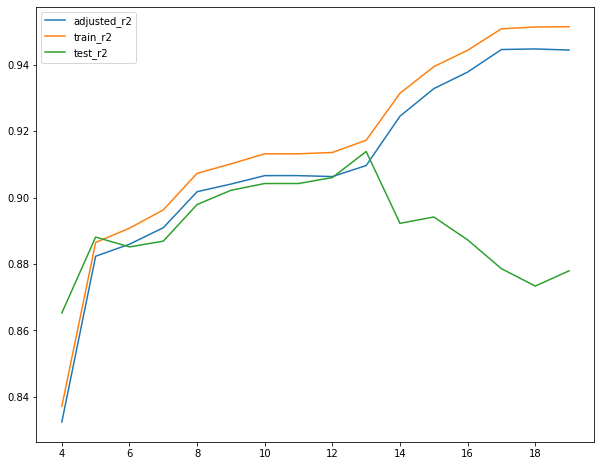

In [36]:
# plotting adjusted_r2,r2,test_r2 against n_features
n_features_list = list(range(4,20))
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

### Final Model

In [54]:
    #We shall be going ahead with 12 features for the final model.
    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_12 = RFE(lm, 12)

    # fit with n features
    rfe_12.fit(X_train, y_train)

    # subset the features selected by rfe_n
    col_12 = X_train.columns[rfe_12.support_]

    # subsetting training data for n selected columns
    X_train_rfe_12 = X_train[col_12]

    # add a constant to the model
    X_train_rfe_12 = sm.add_constant(X_train_rfe_12)


    # fitting the model with n variables
    lm_12 = sm.OLS(y_train, X_train_rfe_12).fit()
    
    # making predictions using rfe_15 sm model
    X_test_rfe_12 = X_test[col_12]

    # # Adding a constant variable 
    X_test_rfe_12 = sm.add_constant(X_test_rfe_12, has_constant='add')

    # # Making predictions
    y_pred_12 = lm_12.predict(X_test_rfe_12)
    
    print(r2_score(y_test, y_pred_12))

0.9060374152228401


In [55]:
col_12

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_two', 'car_company_bmw',
       'car_company_porsche'],
      dtype='object')

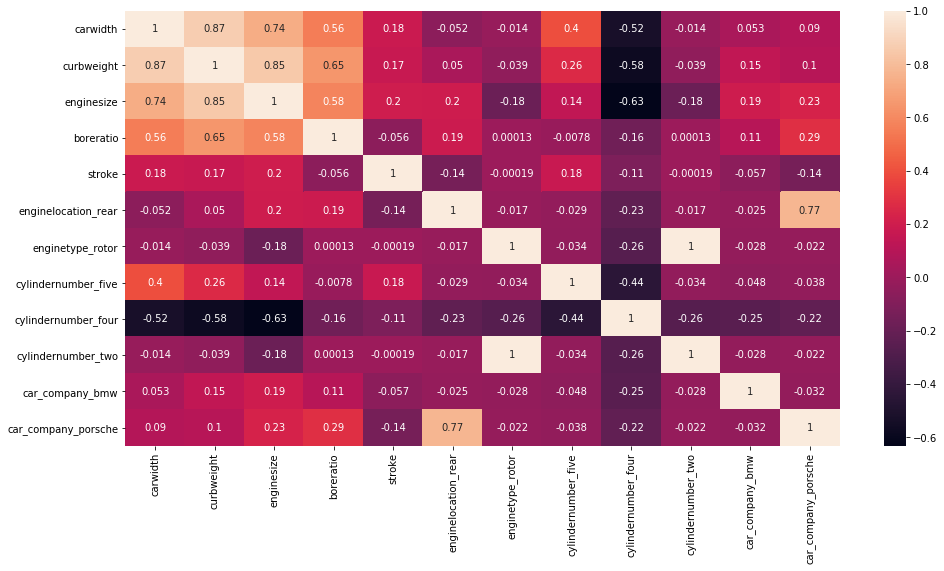

In [56]:
# MultiCollinearity (12 columns)
cors = X.loc[:, list(col_12)].corr()
plt.figure(figsize=(16,8))
sns.heatmap(cors, annot=True)
plt.show()

 Use VIF (Variance Inflation Factor) to remove the multicollinear columns based on these 12 columns and 
 check, if it further improves the r2_score

In [40]:
# Function to calculate VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [41]:
vif_based_columns = calculate_vif_(X.loc[:, list(col_12)])

dropping 'enginetype_rotor' at index: 6
dropping 'enginesize' at index: 2
dropping 'curbweight' at index: 1
Remaining variables:
Index(['carwidth', 'boreratio', 'stroke', 'enginelocation_rear',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_two',
       'car_company_bmw', 'car_company_porsche'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [42]:
vif_based_columns

,carwidth,boreratio,stroke,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_two,car_company_bmw,car_company_porsche
0,-0.844782,0.519071,-1.839377,-0.121867,-0.238120,0.537874,-0.141069,-0.201517,-0.158114
1,-0.844782,0.519071,-1.839377,-0.121867,-0.238120,0.537874,-0.141069,-0.201517,-0.158114
2,-0.190566,-2.404880,0.685946,-0.121867,-0.238120,-1.859172,-0.141069,-0.201517,-0.158114
3,0.136542,-0.517266,0.462183,-0.121867,-0.238120,0.537874,-0.141069,-0.201517,-0.158114
4,0.230001,-0.517266,0.462183,-0.121867,4.199567,-1.859172,-0.141069,-0.201517,-0.158114
...,...,...,...,...,...,...,...,...,...
200,1.398245,1.666445,-0.336970,-0.121867,-0.238120,0.537874,-0.141069,-0.201517,-0.158114
201,1.351515,1.666445,-0.336970,-0.121867,-0.238120,0.537874,-0.141069,-0.201517,-0.158114
202,1.398245,0.926204,-1.232021,-0.121867,-0.238120,-1.859172,-0.141069,-0.201517,-0.158114
203,1.398245,-1.183483,0.462183,-0.121867,-0.238120,-1.859172,-0.141069,-0.201517,-0.158114


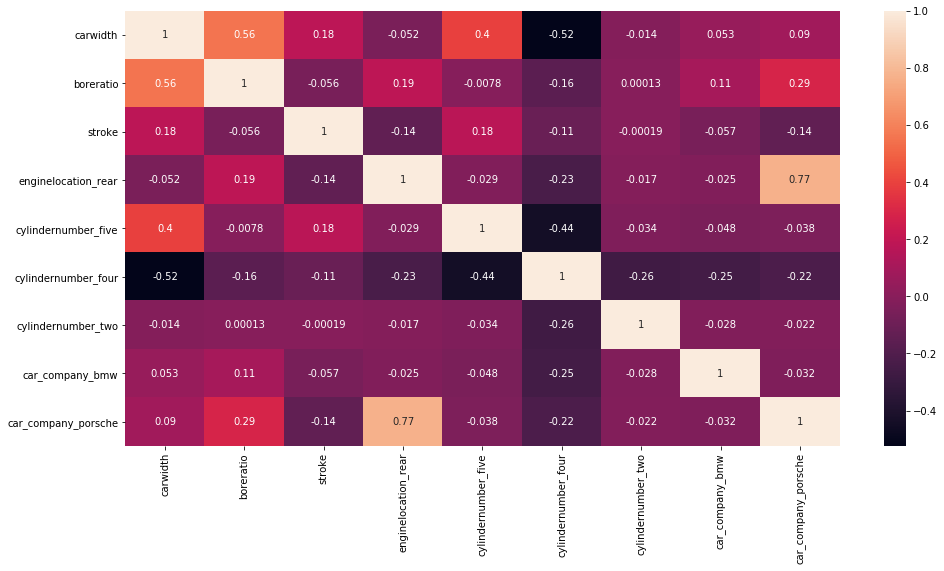

In [43]:
# MultiCollinearity (9 Columns)
cors = X.loc[:, list(vif_based_columns)].corr()
plt.figure(figsize=(16,8))
sns.heatmap(cors, annot=True)
plt.show()

In [44]:
vif_based_columns.columns

Index(['carwidth', 'boreratio', 'stroke', 'enginelocation_rear',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_two',
       'car_company_bmw', 'car_company_porsche'],
      dtype='object')

## Updated model (with 9 columns)

In [45]:
    # fitting the model with 9 variables
    #col_9 = X_train[vif_based_columns.columns]
    
    X_train_rfe_9 = X_train[vif_based_columns.columns]
    
    # Add constant variable
    X_train_rfe_9 = sm.add_constant(X_train_rfe_9)
                                   
    lm_9 = sm.OLS(y_train, X_train_rfe_9).fit()
    
    # making predictions using rfe_15 sm model
    X_test_rfe_9 = X_test[vif_based_columns.columns]

    # # Adding a constant variable 
    X_test_rfe_9 = sm.add_constant(X_test_rfe_9, has_constant='add')

    # # Making predictions
    y_pred_9 = lm_9.predict(X_test_rfe_9)
    
    print(r2_score(y_test, y_pred_9))

0.8333434404602709


Removal of the multicollinear columns did not improve the <b>r2_score</b>. hence, we can stick with the <b>12 columns </b> 
and the r2_score is <b> 0.9060374152228401 </b>

## Final Model Evaluation
 - Error terms are normally distributed about the mean
 - The mean is quite close to zero
 - Variance of the error term is nearly constant

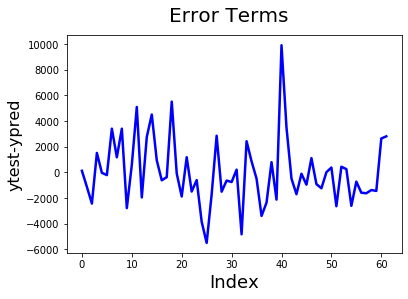

In [62]:
c = [i for i in range(len(y_pred_12))]
fig = plt.figure()
plt.plot(c,y_test-y_pred_12, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

In [63]:
# Mean
np.mean(y_test-y_pred_12)

-4.025770834204019

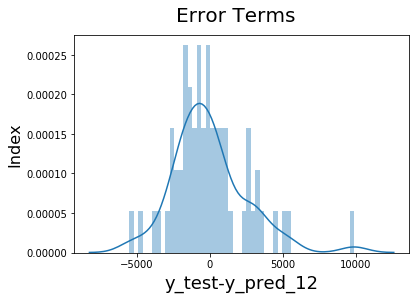

In [66]:
# Plot the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_12),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred_12', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

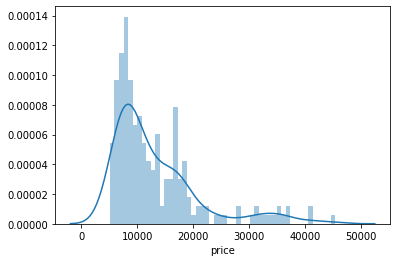

In [67]:
# Distribution of car's price
sns.distplot(cars['price'],bins=50)
plt.show()